# Facial Segmentation

Purpose: extract bitmoji skin colour from images

Steps:
1. Use facial segmentation tutorial [code](https://realpython.com/face-recognition-with-python/) to identify faces
2. Test different ways of finding skin colour
    3. Centre of picture?
    4. Modal colour in the face?
3. Add to CSV

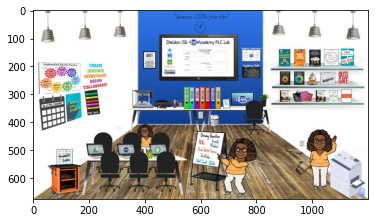

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import random as rng
import pandas as pd
import numpy as np
import cv2

# Good example?
path ='../data/input/user147_2362.jpg'

# Bad example
# path = "../data/input/user365_2880.jpg"

bitmoji = cv2.imread(path, 1)
bitmoji =  cv2.cvtColor(bitmoji, cv2.COLOR_BGR2RGB)
plt.imshow(bitmoji)
hsv_bitmoji = cv2.cvtColor(bitmoji, cv2.COLOR_RGB2HSV)


In [15]:
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

In [20]:
faces = face_cascade.detectMultiScale(
    hsv_bitmoji,
    minNeighbors=4,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print(len(faces))

3


Found 3 face(s)!


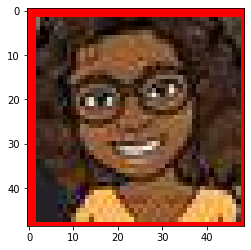

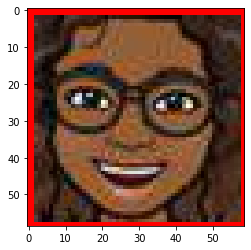

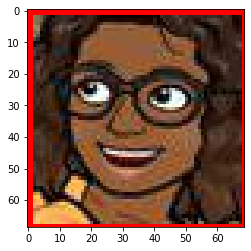

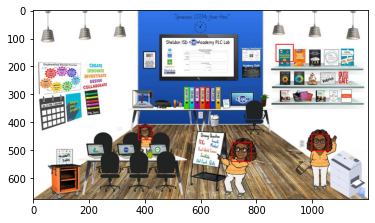

In [21]:
print(f"Found {len(faces)} face(s)!")
face = None
centre_pixel = None
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(bitmoji, (x, y), (x+w, y+h), (255,0, 0), 2)
    plt.figure()
    centre_pixel = (int(h/2),int(w/2))
    face = bitmoji[y:y+h, x:x+w]
    plt.imshow(face)
plt.figure()
plt.imshow(bitmoji)

## Detecting face colour

1. Centre of image,
2. mean pixel value
3. modal pixel value

### Centre of image

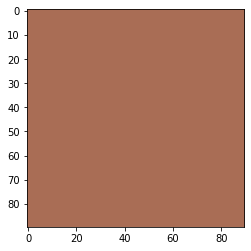

In [22]:
centre_col = face[centre_pixel[0],centre_pixel[1],:]
blank_img = np.tile(centre_col, [90, 90,1]).astype(int)
plt.imshow(blank_img)

### Mean pixel value

In [23]:
reduced_face = face[10:-10,10:-10,:]

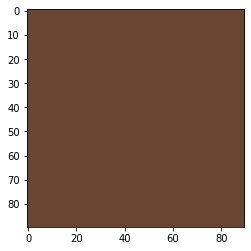

In [24]:
rgb = np.mean(reduced_face,axis=(0,1))
blank_img = np.tile(rgb, [90, 90,1]).astype(int)
plt.imshow(blank_img)

#### K-Means clustering


(2401, 3)
Dominant color is: rgb([104  70  49])


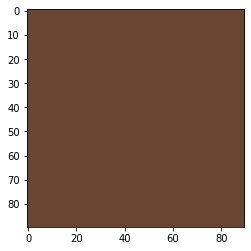

In [25]:
def print_colors(img,num_clusters=1):
    data = np.reshape(img, (-1,3))
    print(data.shape)
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(data,num_clusters,None,criteria,10,flags)

    for center in centers:
        print('Dominant color is: rgb({})'.format(center.astype(np.int32)))
        blank_img = np.tile(center.astype(np.int32), [90, 90,1]).astype(int)
        plt.figure()
        plt.imshow(blank_img)
print_colors(reduced_face,1)